In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:

class Perceptron():   

    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):  #po vytvoreni instancie triedy prebehne ako prvy konstruktor, v ktorom sa nastavi hodnota rychlosti ucenia = 0.01, pocet iteracii = 10
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
    
    def fit(self, X,y):      #metoda ktora dostava vstupy ako parametre X,y , cize cisla ktore vytiahneme z .csv
        self.vahy = np.zeros(1+ X.shape[1])  #nastavenie vahy na pole  o troch nulach [0. 0. 0.]
        print("Inicializovane vahy vyzeraju nasldovne ", self.vahy)
        self.errors_=[]  #vytvorenie prazdneho pola pre errory
        
        for i in range(self.n_iter):     #cyklus ktory prebehne 10krat na zaklade premennej self.n_iter priradenej v konstruktore
            errors = 0  #na zaciatku je premenna na uchovavanie erroru je 0
            for matica,vystup in zip(X,y):    #prechadza polami X,y a jednotlive riadky pouziva ako pre prvy riadok X=matica , y = vystup, pricom funkcia zip() spoji dve polia do jedneho objektu
                update = self.eta * (vystup-self.predikcia(matica)) #rychlost ucenia vynasobime rozdielom vystupu(meni kazdou iteraciou for) a vysledkom z metody predikcia, do ktorej posielame ako vstup premennu matica, ktora sa meni po kazdej iteracii cyklu for
                self.vahy[1:] += update*matica #posledne dve hodnoty premennej(matice) vahy postupne navysuje o nasobok update a matica
                self.vahy[0]+= update #poslednu hodnotu matice vahy, navysuje o hodnotu update, ktora sa dynamicky meni na zaciatku cyklu
                errors += int(update !=0.0) #pripocitavame do premennej errory, zkonvertovane na integer teda celocislenu premennu ale iba ak sa nerovna 0
            self.errors_.append(errors)   #pridavame error do zoznamu vzdy ked prejde vnutorni cyklus  , ktory bude napokon obsahovat 10 roznych hodnot
            print("Error pridavany do zoznamu errors_", errors)
        print("Matica vah vyzera nasledovne", self.vahy)
        print("Pole errors_ vyzera nasledovne", self.errors_)
        return self  

    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]  #scita dve polia z premennych vahy teda prvy a druhy riadok a nasledne ich vysledok scita s polom X

    def predikcia(self, X):   
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # ak vysledne pole z metody net_input obsahuje vsetky cisla vacsia ako 0 tak vrati 1, inak vrati -1
    
    def err(self):
        return self.errors_ # vracia pole obsahujuce errory

Inicializovane vahy vyzeraju nasldovne  [0. 0. 0.]
Error pridavany do zoznamu errors_ 2
Error pridavany do zoznamu errors_ 2
Error pridavany do zoznamu errors_ 3
Error pridavany do zoznamu errors_ 2
Error pridavany do zoznamu errors_ 1
Error pridavany do zoznamu errors_ 0
Error pridavany do zoznamu errors_ 0
Error pridavany do zoznamu errors_ 0
Error pridavany do zoznamu errors_ 0
Error pridavany do zoznamu errors_ 0
Matica vah vyzera nasledovne [-0.04  -0.068  0.182]
Pole errors_ vyzera nasledovne [2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


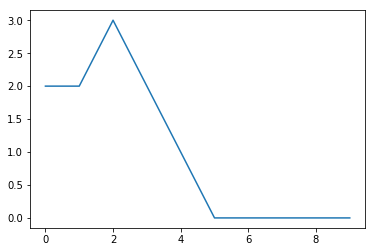

In [23]:
df = pd.read_csv('data.csv', header = None)

X= df.iloc[0:100, [0,2]].values
y= df.iloc[0:100,4].values
y= np.where(y=='Iris-setosa',-1,1)


ppn = Perceptron()  
ppn.fit(X,y)   
plt.plot(ppn.err())



